# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:\A\Education\Data Science\Reduce hospital readmission/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

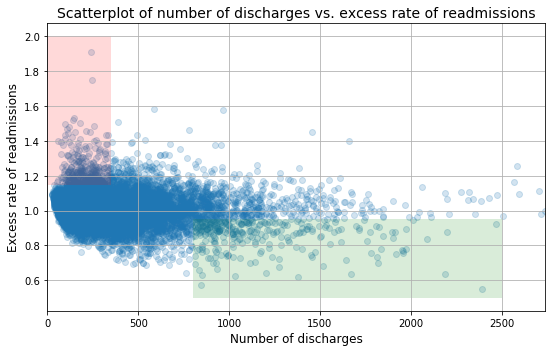

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Answer for question A: I do not agree with the above analysis, because the analysis is only based on visaul observation and there is no statistic evidence to prove this conclusion. First of all, it's hard to tell whether there is correlation between numbers of discharge and excess readmission rate or not based on the scatterplot. Second, comparing the mean excess readmission rate for number of discharges < 100 and number of discharges > 1000 is not a dicisive statistical evidence that rate of readmissions is decreasing when number of discharges increases. A sound statistical hypothesis has to be conducted. 

Answer for question B:
Setup the null hypothesis: R1=R2
      alternative hypothesis: R1>R2 
Where R1: mean excess readmission rate when number of discharges < 100;
      R2: mean excess readmission rate when number of discharges > 1000;

In [6]:
d = {'number of discharges': x, 'excess readmission rate':y}
df=pd.DataFrame(data=d)

In [7]:
df.head()

,number of discharges,excess readmission rate
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [8]:
low_discharge=df[df['number of discharges']<100]

In [9]:
low_discharge.shape

(1188, 2)

In [10]:
high_discharge=df[df['number of discharges']>1000]

In [11]:
high_discharge.head()

,number of discharges,excess readmission rate
11034,1002,0.9192
11035,1004,1.1405
11036,1007,1.0760
11037,1007,0.9930
11038,1008,1.0765


In [12]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p



In [13]:
independent_ttest(low_discharge['excess readmission rate'],high_discharge['excess readmission rate'],0.01)

(7.490062060325073, 1646, 2.328615523896484, 1.1168843627729075e-13)

Based on above calculation, t value is greater than 0 and p/2 value is close to 0. Therefore, the null hypothesis is rejected and the alternative hypothesis is true.

In this case, both the statistical significant and the practical significant suggest that the excess readmission rate decrease when the number of of discharges increase. However, as we will not be able to prove that this is true with the practical significance, the statistical significant help us to reject the null hypothesis and prove the alternative hypothesis is true. Therefore, we will be able to covey a decisive conclusion to the client.

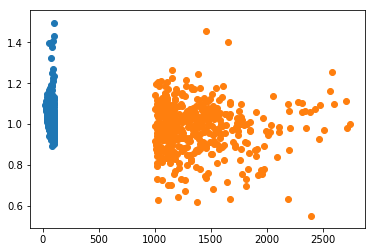

In [20]:
plt.scatter(low_discharge['number of discharges'],low_discharge['excess readmission rate'])
plt.scatter(high_discharge['number of discharges'],high_discharge['excess readmission rate'])
plt.show()

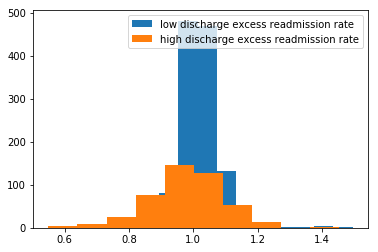

In [26]:
plt.hist(low_discharge['excess readmission rate'],label='low discharge excess readmission rate')
plt.hist(high_discharge['excess readmission rate'],label='high discharge excess readmission rate')
plt.legend()
plt.show()

The previous plot is very intuitive but too busy to visualize as all of the data points are plotted. Therefore, I plot the excess readmission rate of only the low number of discharges and the high number of discharges in this plot, just to make it easier to visualize. In addition, the histogram shows the medium of the excess readimission rate of low discharge number is slightly higher than that of high discharge number.